# **Введение в Data Science**

## *Урок 5. Пайплайн исследования данных. Интерпретация моделей для бизнеса*

*Задание*

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:

1) провести исследовательский анализ данных,

2) визуализировать результаты и сделать из них выводы,

3) провести предобработку признаков (возможно создать новые),

4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,

5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,

6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).

## Importing Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/LTV.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
print(data.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
print(data.describe())

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

#### Listing the name of columns in the Dataset

In [ ]:
print(list(data.columns))

['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']


## Data Pre-processing

#### Checking for Missing Values

In [ ]:
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


#### One-Hot Encoding of Categorical Variables

In [ ]:
# Encoding 'Customer Lifetime Value' column using LabelEncoder
le = LabelEncoder()
data['Customer Lifetime Value'] = le.fit_transform(data['Customer Lifetime Value'])

#### Feature Scaling

In [ ]:
# List of numerical features to scale
numerical_features = ['Income','Monthly Premium Auto',
 'Months Since Last Claim', 'Months Since Policy Inception',
 'Number of Open Complaints', 'Number of Policies',  'Total Claim Amount']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the preprocessed data
print("\nPreprocessed Data Head:")
print(data.head())

# Save the preprocessed data to a new CSV file
data.to_csv('Preprocessed_CLV.csv', index=False)


Preprocessed Data Head:
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington                      975       No     Basic  Bachelor   
1  QZ44356     Arizona                     4659       No  Extended  Bachelor   
2  AI49188      Nevada                     6900       No   Premium  Bachelor   
3  WW63253  California                     5140       No     Basic  Bachelor   
4  HB64268  Washington                     1058       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender    Income  ...  \
0           2/24/11         Employed      F  0.612827  ...   
1           1/31/11       Unemployed      F -1.239617  ...   
2           2/19/11         Employed      F  0.365710  ...   
3           1/20/11       Unemployed      M -1.239617  ...   
4            2/3/11         Employed      M  0.203390  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                     -1.543287         

## Exploratoratory Data Analysis

#### Visualize the distribution of the target variable 'Customer Lifetime Value'

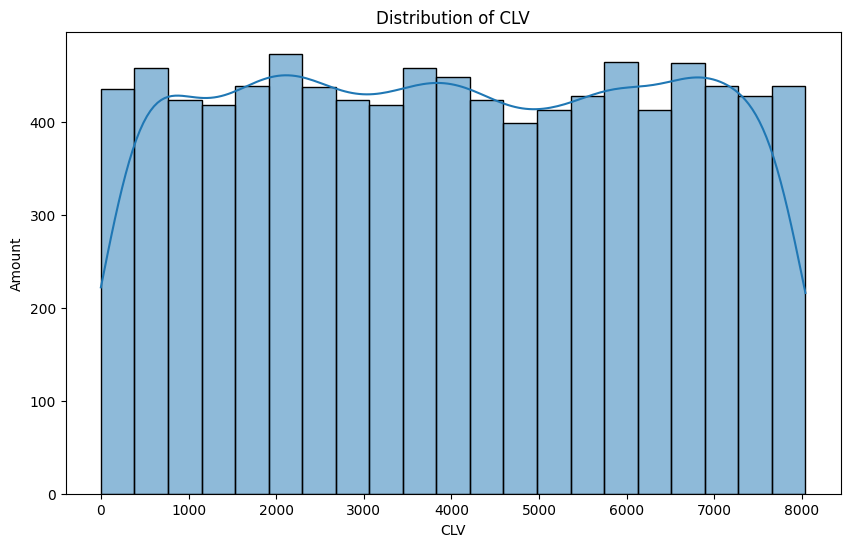

In [ ]:
data = pd.read_csv('Preprocessed_CLV.csv')
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Lifetime Value'], kde=True)
plt.title('Distribution of CLV')
plt.xlabel('CLV')
plt.ylabel('Amount')
plt.show()

### Correlation matrix to identify relationships between variables

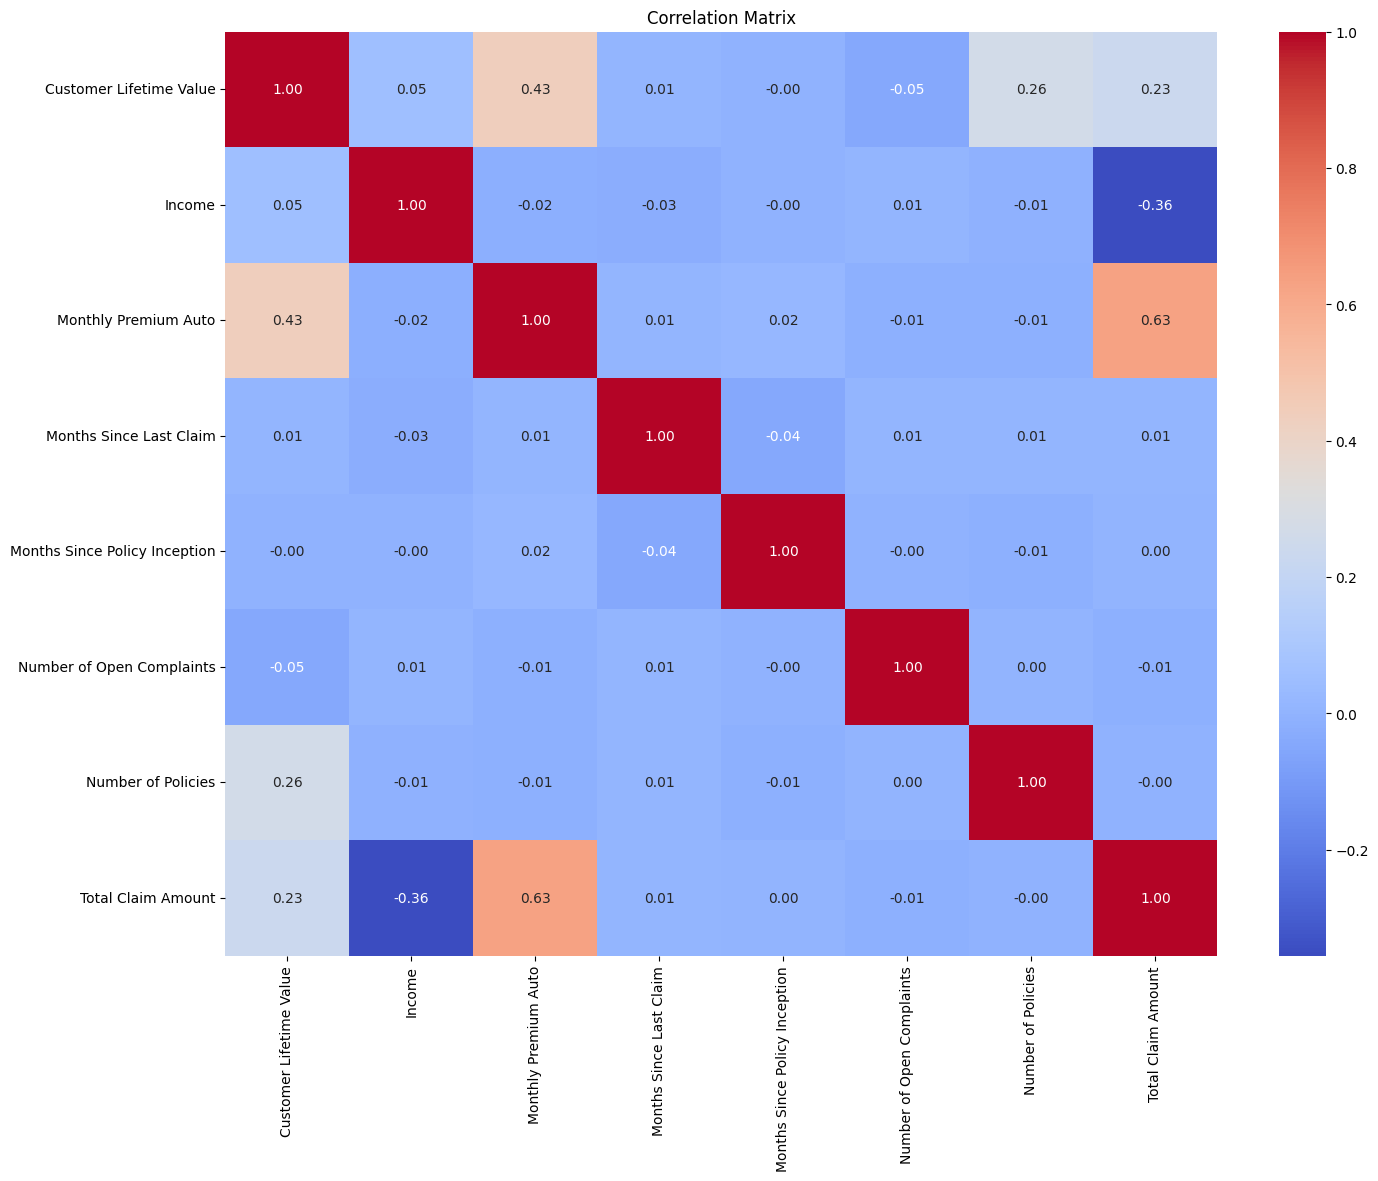

In [ ]:
plt.figure(figsize=(16, 12))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Pairplot to visualize relationships between a subset of variables

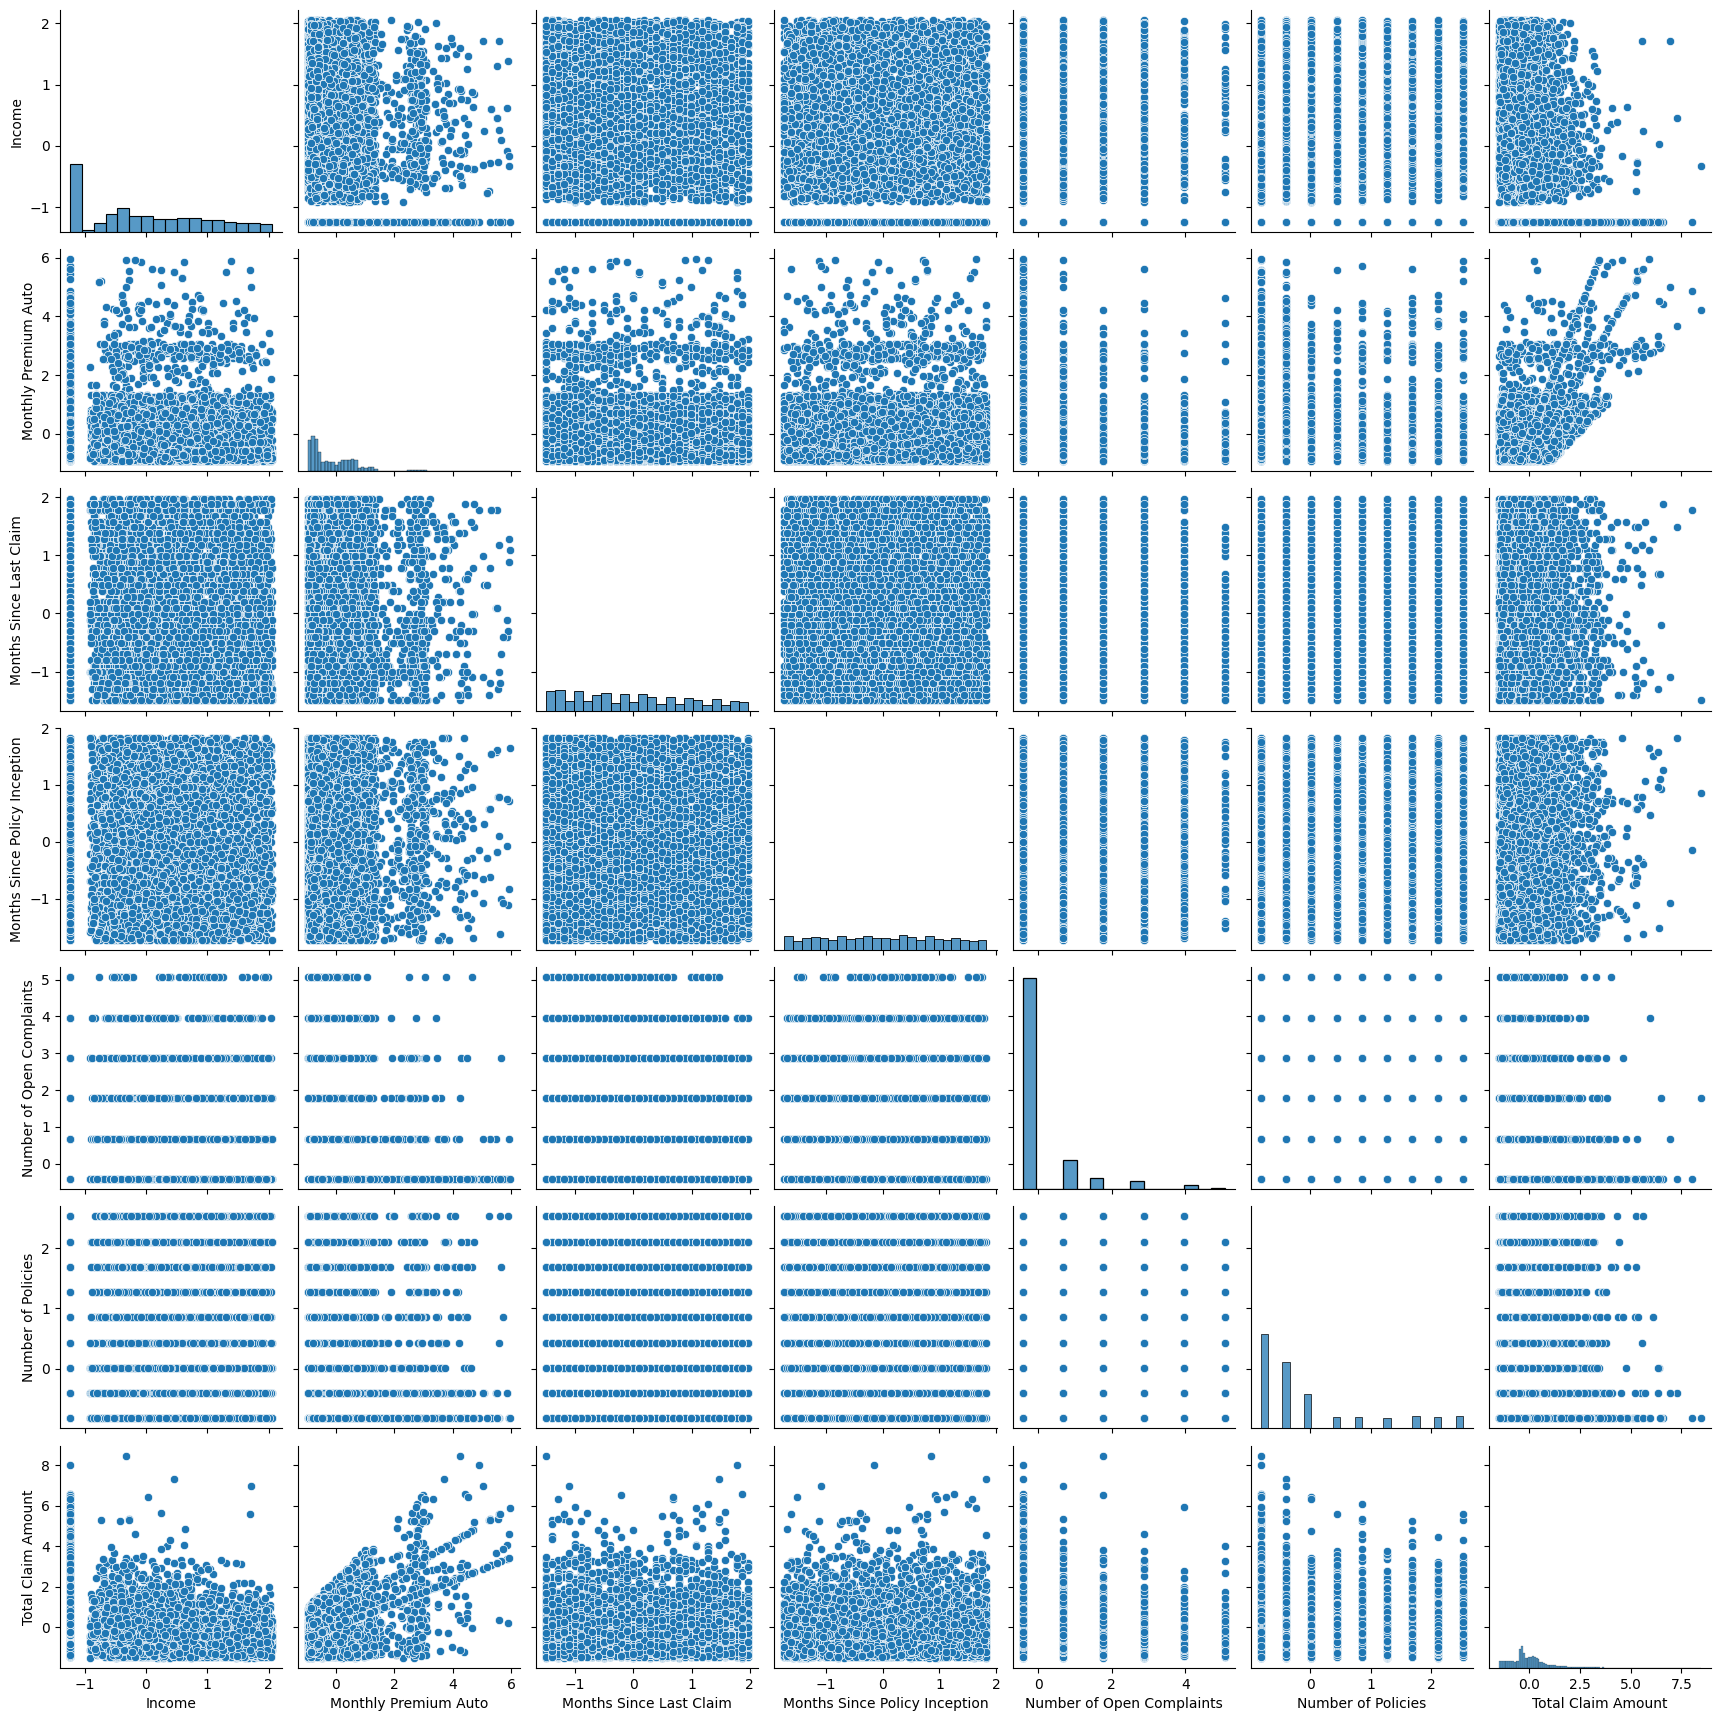

In [ ]:
selected_features = ['Income','Monthly Premium Auto',
 'Months Since Last Claim', 'Months Since Policy Inception',
 'Number of Open Complaints', 'Number of Policies',  'Total Claim Amount']
sns.pairplot(data[selected_features])
plt.show()

### Scatter plots to examine the relationships between 'Customer Lifetime Value' and key numerical features

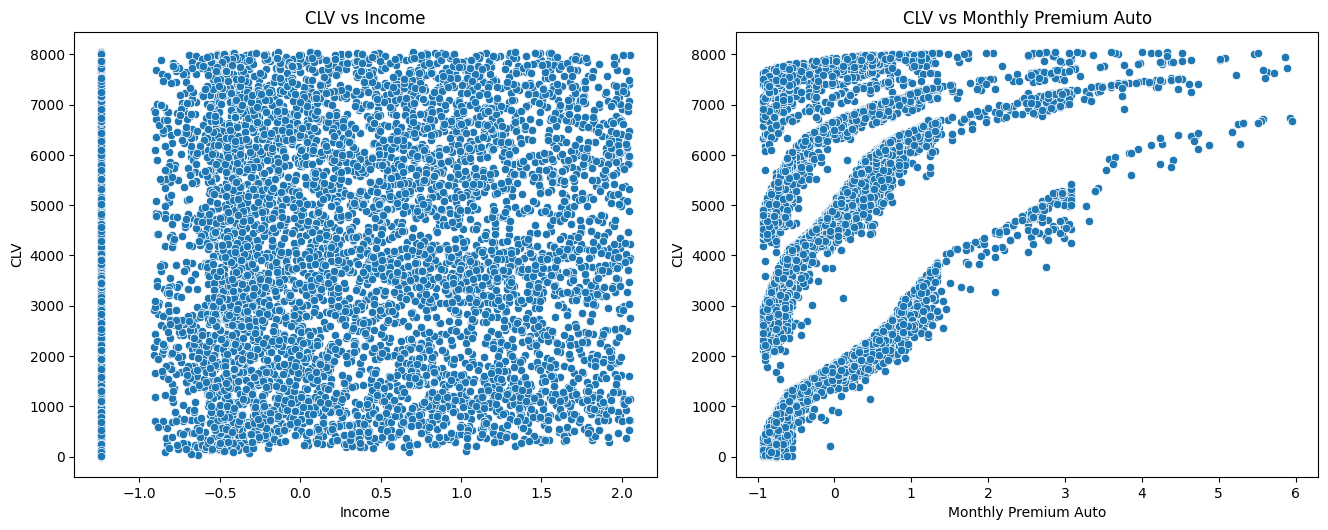

In [ ]:
numerical_features = ['Income','Monthly Premium Auto']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='Customer Lifetime Value', data=data)
    plt.title(f'CLV vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('CLV')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Customer Lifetime Value', 'State', 'Customer', 'Response',
                'Sales Channel', 'Vehicle Class', 'Coverage', 'Education', 'Effective To Date',
                'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                 'Policy Type', 'Policy', 'Renew Offer Type',
               'Sales Channel',  'Vehicle Size'], axis=1)
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_performance[name] = {'MSE': mse, 'R2': r2}
    print(f'{name} - MSE: {mse}, R2: {r2}')

# Select the best model based on R2 score
best_model_name = max(model_performance, key=lambda x: model_performance[x]['R2'])
best_model = models[best_model_name]

print(f'\nBest Model: {best_model_name}')

Linear Regression - MSE: 4035020.788033357, R2: 0.2732107058123827
Random Forest - MSE: 153261.33759441707, R2: 0.9723945166015399
Gradient Boosting - MSE: 167315.80658224167, R2: 0.9698630209457711

Best Model: Random Forest
